# Q1: Implementation of edge detection and hole filling for binary and gray-scale images

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

grayscale_image1 = cv2.imread('grayscale1.jpeg', 0)
grayscale_image2 = cv2.imread('grayscale2.png', 0)
binary_image1 = cv2.imread('binary1.png', 0)
binary_image2 = cv2.imread('binary2.png', 0)


lena_image = cv2.imread('lena.tif', 0)

In [3]:
#Edge Detection for Binary Images
def binary_edge_detection(image):
    #Apply morphological operations: dilation and erosion
    dilated = cv2.dilate(image, None, iterations=1)
    eroded = cv2.erode(image, None, iterations=1)
    edges = dilated - eroded
    return edges

#Edge Detection for Grayscale Images using Sobel operator
def grayscale_edge_detection(image):
    #Apply Sobel operator
    edges = cv2.Sobel(image, cv2.CV_64F, 1, 1, ksize=3)
    edges = np.absolute(edges)
    edges = np.uint8(edges)
    return edges

#Hole Filling for Binary Images
def binary_hole_filling(image):
    #Apply morphological operation: dilation
    filled = cv2.dilate(image, None, iterations=1)
    return filled

# Hole Filling for Grayscale Images using region growing
def grayscale_hole_filling(image, seed_point):
    # Create a mask to track filled region
    filled = np.zeros_like(image, dtype=np.uint8)
    filled[seed_point] = 255

    # Region growing
    neighbors = [seed_point]
    while len(neighbors) > 0:
        current_point = neighbors.pop(0)
        row, col = current_point

        # Check 8-connected neighbors
        for i in range(row-1, row+2):
            for j in range(col-1, col+2):
                if 0 <= i < image.shape[0] and 0 <= j < image.shape[1] and filled[i, j] == 0:
                    # Check if the neighbor is part of the hole region
                    if image[i, j] == 0:
                        filled[i, j] = 255
                        neighbors.append((i, j))

    return filled


In [4]:
# Perform edge detection
grayscale_edges1 = grayscale_edge_detection(grayscale_image1)
grayscale_edges2 = grayscale_edge_detection(grayscale_image2)
binary_edges1 = binary_edge_detection(binary_image1)
binary_edges2 = binary_edge_detection(binary_image2)

# Perform hole filling
grayscale_filled1 = grayscale_hole_filling(grayscale_image1, (0, 0))  # Provide the seed point for filling
grayscale_filled2 = grayscale_hole_filling(grayscale_image2, (0, 0))
binary_filled1 = binary_hole_filling(binary_image1)
binary_filled2 = binary_hole_filling(binary_image2)

Text(0.5, 1.0, 'Grayscale Filled Image 1')

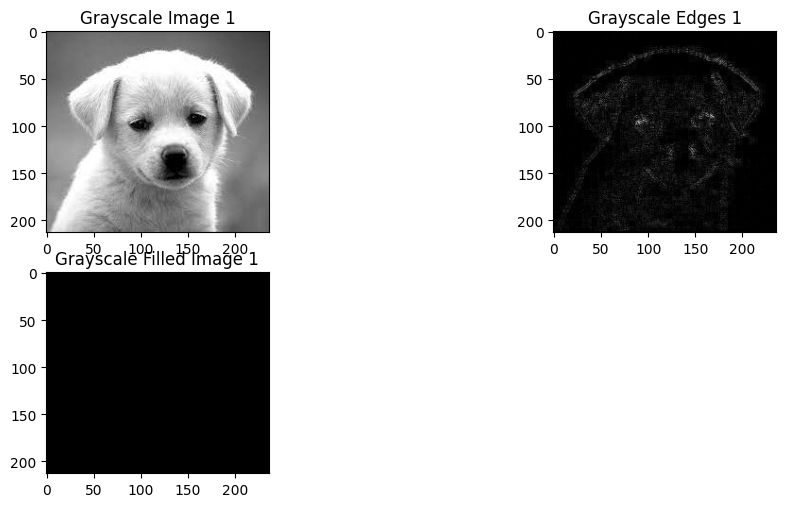

In [5]:
# Display the results
plt.figure(figsize=(12, 12))

plt.subplot(421)
plt.imshow(grayscale_image1, cmap='gray')
plt.title('Grayscale Image 1')

plt.subplot(422)
plt.imshow(grayscale_edges1, cmap='gray')
plt.title('Grayscale Edges 1')

plt.subplot(423)
plt.imshow(grayscale_filled1, cmap='gray')
plt.title('Grayscale Filled Image 1')

Text(0.5, 1.0, 'Grayscale Filled Image 2')

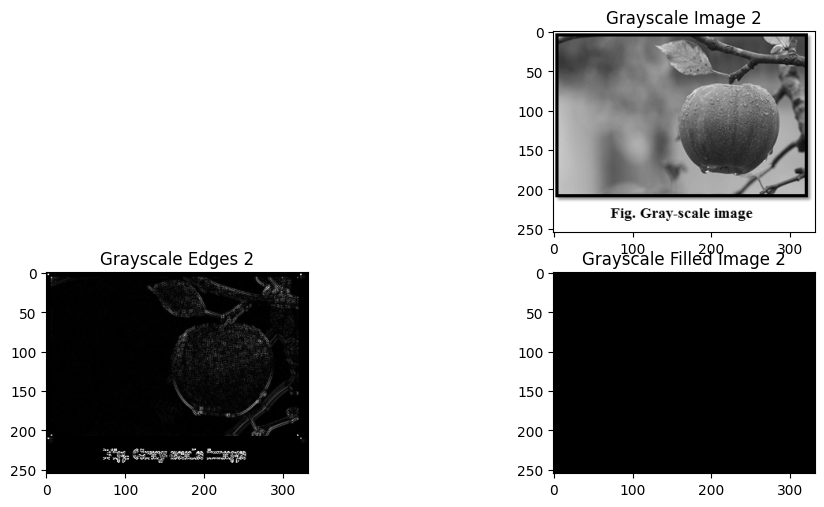

In [6]:
# Display the results
plt.figure(figsize=(12, 12))

plt.subplot(424)
plt.imshow(grayscale_image2, cmap='gray')
plt.title('Grayscale Image 2')

plt.subplot(425)
plt.imshow(grayscale_edges2, cmap='gray')
plt.title('Grayscale Edges 2')

plt.subplot(426)
plt.imshow(grayscale_filled2, cmap='gray')
plt.title('Grayscale Filled Image 2')

Text(0.5, 1.0, 'Binary Filled Image 1')

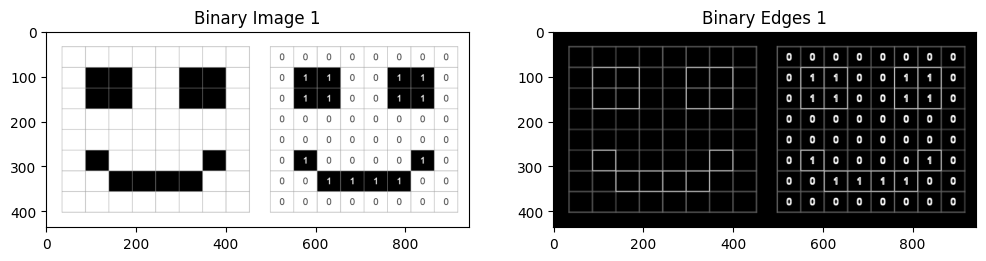

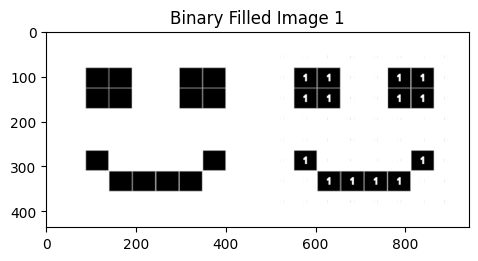

In [7]:
# Display the results
plt.figure(figsize=(12, 12))

plt.subplot(427)
plt.imshow(binary_image1, cmap='gray')
plt.title('Binary Image 1')

plt.subplot(428)
plt.imshow(binary_edges1, cmap='gray')
plt.title('Binary Edges 1')

plt.figure(figsize=(12, 12))

plt.subplot(121)
plt.imshow(binary_filled1, cmap='gray')
plt.title('Binary Filled Image 1')

Text(0.5, 1.0, 'Binary Image 2')

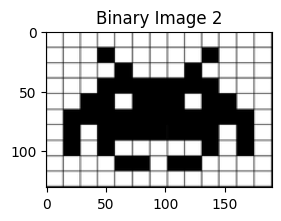

In [8]:
plt.subplot(122)
plt.imshow(binary_image2, cmap='gray')
plt.title('Binary Image 2')

<ipython-input-9-153e8e32e324>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(428)


Text(0.5, 1.0, 'Binary Filled Image 2')

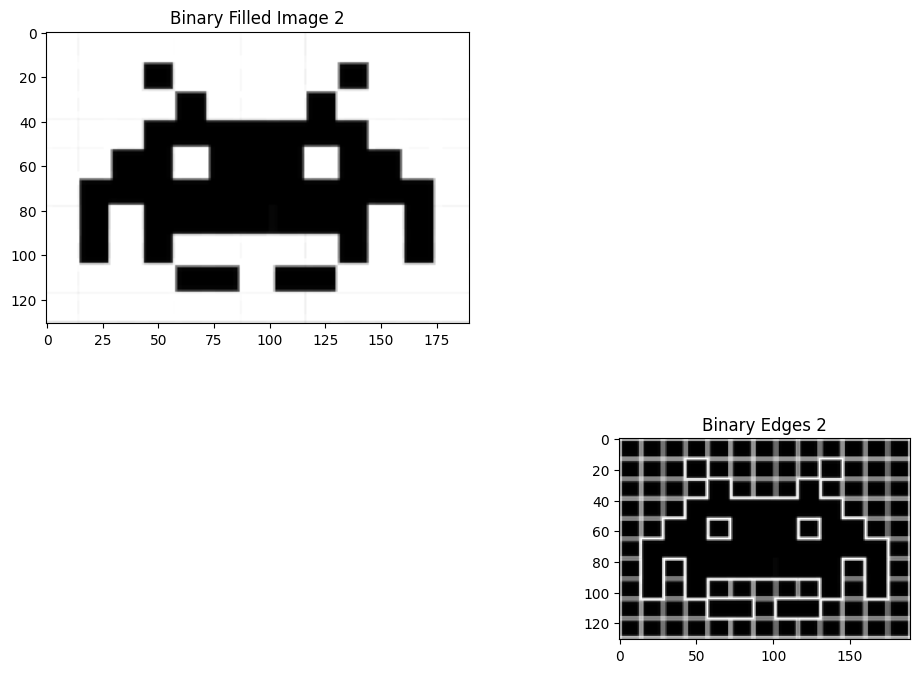

In [9]:
# Display the results
plt.figure(figsize=(12, 12))

plt.subplot(122)
plt.imshow(binary_image2, cmap='gray')
plt.title('Binary Image 2')

plt.subplot(428)
plt.imshow(binary_edges2, cmap='gray')
plt.title('Binary Edges 2')

plt.subplot(121)
plt.imshow(binary_filled2, cmap='gray')
plt.title('Binary Filled Image 2')

In [10]:
plt.show()

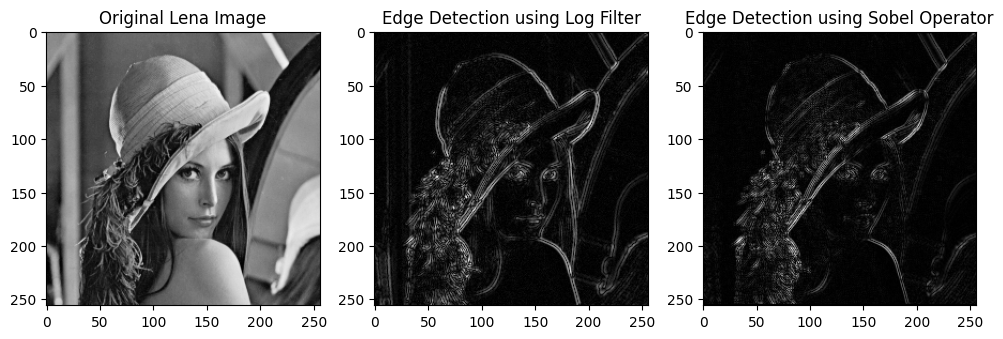

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load Lena image
lena_image = cv2.imread('lena.tif', 0)

# Edge Detection using Log Filter
def log_edge_detection(image):
    # Apply Laplacian of Gaussian (LoG) filter
    blurred = cv2.GaussianBlur(image, (3, 3), 0)
    edges = cv2.Laplacian(blurred, cv2.CV_64F)

    # Normalize and convert to uint8
    edges = np.absolute(edges)
    edges = np.uint8(edges)

    return edges

# Edge Detection using Sobel Operator
def sobel_edge_detection(image):
    # Apply Sobel operator
    edges = cv2.Sobel(image, cv2.CV_64F, 1, 1, ksize=3)
    edges = np.absolute(edges)
    edges = np.uint8(edges)

    return edges

# Perform edge detection using log filter
lena_log_edges = log_edge_detection(lena_image)

# Perform edge detection using Sobel operator
lena_sobel_edges = sobel_edge_detection(lena_image)

# Display the results
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.imshow(lena_image, cmap='gray')
plt.title('Original Lena Image')

plt.subplot(132)
plt.imshow(lena_log_edges, cmap='gray')
plt.title('Edge Detection using Log Filter')

plt.subplot(133)
plt.imshow(lena_sobel_edges, cmap='gray')
plt.title('Edge Detection using Sobel Operator')

plt.show()

# Q2: texture synthesis

In [12]:
# Load input textures
texture1 = plt.imread('im1.png')
texture2 = plt.imread('im2.png')
texture3 = plt.imread('im3.png')
texture4 = plt.imread('im4.png')

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

def preprocess_texture(texture):
    # Preprocess the input texture image (e.g., convert to grayscale, normalize, etc.)
    gray_texture = cv2.cvtColor(texture, cv2.COLOR_BGR2GRAY)
    preprocessed_texture = cv2.normalize(gray_texture, None, 0, 255, cv2.NORM_MINMAX)
    return preprocessed_texture

def divide_into_blocks(texture, block_size):
    # Divide the texture into blocks of the specified size
    height, width = texture.shape[:2]
    blocks = []
    for i in range(0, height, block_size):
        for j in range(0, width, block_size):
            block = texture[i:i+block_size, j:j+block_size]
            blocks.append(block)
    return blocks

def analyze_blocks(blocks):
    # Analyze the statistics and features of the texture blocks
    analyzed_features = []
    for block in blocks:
        features = (np.mean(block), np.var(block))
        analyzed_features.append(features)
    return analyzed_features

def find_most_similar_block(block, analyzed_features):
    # Find the most similar block in the input texture based on the analyzed features
    target_mean, target_var = np.mean(block), np.var(block)
    similarities = []
    for features in analyzed_features:
        source_mean, source_var = features[0], features[1]
        similarity = np.abs(source_mean - target_mean) + np.abs(source_var - target_var)
        similarities.append(similarity)
    most_similar_block = np.argmin(similarities)
    return most_similar_block

def min_cut_blend(block1, block2):
    # Perform min cut blending between two blocks
    blend_mask = np.zeros_like(block1, dtype=np.uint8)
    height, width = block1.shape[:2]
    blend_mask[:, :width//2] = 255

    # Perform seamless cloning using OpenCV's function
    try:
        blended_block = cv2.seamlessClone(block1, block2, blend_mask, (width//2, height//2), cv2.NORMAL_CLONE)
    except cv2.error as e:
        print(f"Error during blending: {e}")
        return None

    return blended_block

def texture_synthesis(textures, output_size, block_size):
    preprocessed_textures = [preprocess_texture(texture) for texture in textures]
    blocks = [divide_into_blocks(texture, block_size) for texture in preprocessed_textures]
    analyzed_features = [analyze_blocks(texture_blocks) for texture_blocks in blocks]

    output_height, output_width = output_size
    output_texture = np.zeros((output_height, output_width), dtype=np.uint8)

    # Randomly select a starting block from the first texture
    random_block = random.choice(blocks[0])
    output_texture[0:block_size, 0:block_size] = random_block[:block_size, :block_size]

    for i in range(block_size, output_height, block_size):
        for j in range(block_size, output_width, block_size):
            current_block = output_texture[i-block_size:i, j-block_size:j]
            similar_block_index = find_most_similar_block(current_block, analyzed_features[0])
            similar_block = blocks[0][similar_block_index]

            # Ensure that both blocks are valid before blending
            if current_block.size == 0 or similar_block.size == 0:
                print("Error: Empty block encountered during blending.")
                return None

            blended_block = min_cut_blend(current_block, similar_block)
            if blended_block is None:
                print("Error: Blending failed.")
                return None

            output_texture[i:i+block_size, j:j+block_size] = blended_block[:block_size, :block_size]

    return output_texture


# Load input textures
texture1 = cv2.imread('im1.png')
texture2 = cv2.imread('im2.png')
texture3 = cv2.imread('im3.png')
texture4 = cv2.imread('im4.png')

# Set parameters
output_size = (512, 512)  # Desired output texture size
block_size = 32  # Block size for analysis and synthesis

# Perform texture synthesis
output_texture = texture_synthesis([texture1, texture2, texture3, texture4], output_size, block_size)

if output_texture is not None:
    # Display the synthesized texture
    plt.imshow(output_texture, cmap='gray')
    plt.title('Synthesized Texture')
    plt.axis('off')
    plt.show()


Error during blending: OpenCV(4.7.0) /io/opencv/modules/imgproc/src/deriv.cpp:792: error: (-215:Assertion failed) !_src.empty() in function 'Laplacian'

Error: Blending failed.
